In [1]:
import ml_funcs as mlf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_process_funcs as dpf

In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
def print_test_table(test_table,Exp_type = True,backends = True, circ_types = True, nans = False):

    for row in test_table:
        print("\nrow")
        for df in row:
            print('\ndf')
            if Exp_type:
                print(df['experiment_type'].unique())
            if backends:
                print(df['backend'].unique())
            if circ_types:
                print(df['circuit_type'].unique())
            if nans:
                print(df.isna().sum())

In [5]:
nr_qubits =4

initial_list = mlf.get_HSR_array_all_backends(nr_qubits) #[df_h,df_s, df_r]
test_table_HSR4q = mlf.get_HSR_test_table(initial_list)

In [6]:
# mlf.create_ml_results_csv('KNN')

In [7]:
# base_param = 3
alg_type = 'KNN'

############################################
for base_param in range(1,15):

    for i in range(len(test_table_HSR4q)):

        train_df = test_table_HSR4q[i][0]
        # nr_test_dfs = len(test_table_HSR4q[i])
        test_dfs = test_table_HSR4q[i][1:]
        #print_test_table([test_table_HSR4q[i]],circ_types=False)
        
        mlf.run_and_print_ml_results(train_df,test_dfs,alg_type,base_param,cross_validation=True,param_settings=1)

In [8]:
df_R4 = initial_list[1]
print(df_R4['backend'].unique())

['torino' 'fez' 'marrakesh' 'brisbane']


In [9]:
df_R4p = mlf.apply_preprosessing(df_R4)

In [10]:
# model1 = KNeighborsClassifier(# best:(kernel = 'poly',degree = 5)
# fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_R4p,model1)
# print(score)
# print(cv_score)

n_neighbors=3, Accuracy=0.95
n_neighbors=4, Accuracy=0.9583333333333334
n_neighbors=5, Accuracy=0.95
n_neighbors=6, Accuracy=0.9541666666666667
n_neighbors=7, Accuracy=0.9666666666666667
n_neighbors=8, Accuracy=0.9583333333333334
n_neighbors=9, Accuracy=0.9583333333333334
n_neighbors=10, Accuracy=0.9583333333333334
n_neighbors=11, Accuracy=0.9583333333333334
n_neighbors=12, Accuracy=0.9625
n_neighbors=13, Accuracy=0.9625
n_neighbors=14, Accuracy=0.9583333333333334
n_neighbors=15, Accuracy=0.9583333333333334
n_neighbors=16, Accuracy=0.9583333333333334
n_neighbors=17, Accuracy=0.9583333333333334
n_neighbors=18, Accuracy=0.9583333333333334
n_neighbors=19, Accuracy=0.9583333333333334
n_neighbors=20, Accuracy=0.95
n_neighbors=21, Accuracy=0.9583333333333334
n_neighbors=22, Accuracy=0.9583333333333334
n_neighbors=23, Accuracy=0.9625
n_neighbors=24, Accuracy=0.9625
n_neighbors=25, Accuracy=0.9625


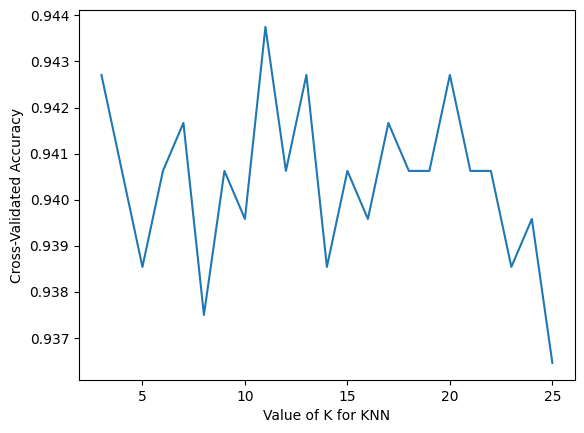

In [11]:
# model1 = KNeighborsClassifier(n_neighbors=3)
k_range = range(3, 26)
k_scores = []

for k in k_range:
    model1 = KNeighborsClassifier(n_neighbors=k, weights="distance",algorithm='auto', leaf_size=30, p=1)
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_R4p,model1)
    k_scores.append(cv_score.mean())
    print(f"n_neighbors={k}, Accuracy={score}")

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [12]:
nr_qubits2 =8

initial_list2 = mlf.get_HSR_array_all_backends(nr_qubits2) #[df_h,df_s, df_r]
test_table_HSR8q = mlf.get_HSR_test_table(initial_list2)

In [13]:
df_R8 = initial_list2[1]
print(df_R8['backend'].unique())

['torino' 'fez' 'marrakesh' 'brisbane']


In [14]:
df_R8p = mlf.apply_preprosessing(df_R8)

n_neighbors=3, Accuracy=0.9875
n_neighbors=4, Accuracy=0.9916666666666667
n_neighbors=5, Accuracy=0.9916666666666667
n_neighbors=6, Accuracy=0.9916666666666667
n_neighbors=7, Accuracy=0.9916666666666667
n_neighbors=8, Accuracy=0.9916666666666667
n_neighbors=9, Accuracy=0.9958333333333333
n_neighbors=10, Accuracy=0.9958333333333333
n_neighbors=11, Accuracy=0.9958333333333333
n_neighbors=12, Accuracy=0.9916666666666667
n_neighbors=13, Accuracy=0.9958333333333333
n_neighbors=14, Accuracy=0.9958333333333333
n_neighbors=15, Accuracy=0.9958333333333333
n_neighbors=16, Accuracy=0.9958333333333333
n_neighbors=17, Accuracy=0.9958333333333333
n_neighbors=18, Accuracy=0.9958333333333333
n_neighbors=19, Accuracy=0.9958333333333333
n_neighbors=20, Accuracy=0.9958333333333333
n_neighbors=21, Accuracy=0.9958333333333333
n_neighbors=22, Accuracy=0.9958333333333333
n_neighbors=23, Accuracy=0.9916666666666667
n_neighbors=24, Accuracy=0.9916666666666667
n_neighbors=25, Accuracy=0.9916666666666667


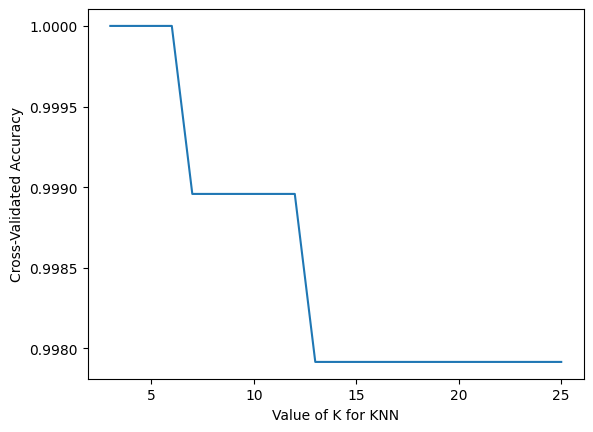

In [ ]:
# model1 = KNeighborsClassifier(n_neighbors=3)
k_range = range(3, 26)
k_scores = []

for k in k_range:
    model2 = KNeighborsClassifier(n_neighbors=k, weights="distance",algorithm='auto', leaf_size=30, p=1)
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_R8p,model2)
    k_scores.append(cv_score.mean())
    print(f"n_neighbors={k}, Accuracy={score}")

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [6]:
nr_qubits3 =16

# initial_list3 = mlf.get_HSR_array_all_backends(nr_qubits3) #[df_h,df_s, df_r]
# test_table_HSR16q = mlf.get_HSR_test_table(initial_list3)
df_S16 = dpf.get_expanded_df('Simulation',16)
df_S16p = mlf.apply_preprosessing(df_S16)

In [ ]:
# df_R16 = initial_list3[1]
# print(df_R16['backend'].unique())

['torino' 'fez' 'marrakesh' 'brisbane']


In [ ]:
# df_R16p = mlf.apply_preprosessing(df_R16)

n_neighbors=3, Accuracy=1.0
n_neighbors=4, Accuracy=1.0
n_neighbors=5, Accuracy=1.0
n_neighbors=6, Accuracy=1.0
n_neighbors=7, Accuracy=1.0
n_neighbors=8, Accuracy=1.0
n_neighbors=9, Accuracy=1.0
n_neighbors=10, Accuracy=1.0
n_neighbors=11, Accuracy=1.0
n_neighbors=12, Accuracy=1.0
n_neighbors=13, Accuracy=1.0
n_neighbors=14, Accuracy=1.0
n_neighbors=15, Accuracy=1.0
n_neighbors=16, Accuracy=1.0
n_neighbors=17, Accuracy=1.0
n_neighbors=18, Accuracy=1.0
n_neighbors=19, Accuracy=1.0
n_neighbors=20, Accuracy=1.0
n_neighbors=21, Accuracy=1.0
n_neighbors=22, Accuracy=1.0
n_neighbors=23, Accuracy=1.0
n_neighbors=24, Accuracy=1.0
n_neighbors=25, Accuracy=1.0


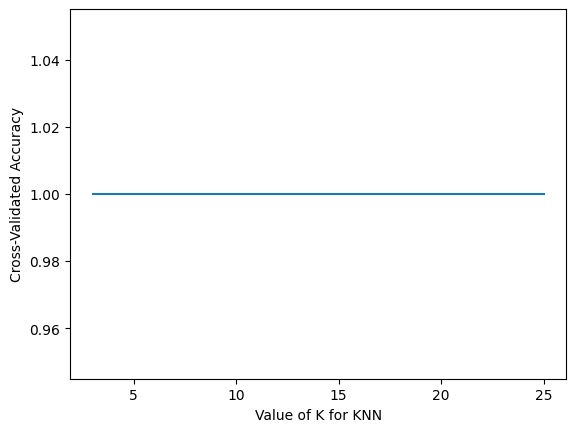

In [7]:
k_range = range(3, 26)
k_scores = []

for k in k_range:
    model3 = KNeighborsClassifier(n_neighbors=k, weights="distance",algorithm='auto', leaf_size=30, p=1)
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_S16p,model3)
    k_scores.append(cv_score.mean())
    print(f"n_neighbors={k}, Accuracy={score}")

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()